# Exploratory Data Analysis (EDA) on my Dataset

## Imports

In [98]:
%matplotlib inline
import pandas as pd 
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas_profiling



## Research Question

#### What car manufacturer produces the longest lasting and best quality of cars based on model year and mileage?

## Loading data and Method Chaining
##### Also stored in project_functions

#### by Year

In [9]:
def load_and_process_df_Method_Chain_by_Year(path_to_csv_file):

    df_Method_Chain_by_Year1 = (
        pd.read_csv("/Users/stevenzonneveld/Desktop/data301/project-group35-project/data/raw/MileStone1.csv")
        .drop(columns = ['Unnamed: 0', 'price', 'title_status', 'color', 'state', 'mileage'], axis = 0)
        .sort_values(by = ['brand'])
        #.drop( df_cleaned [ df_cleaned ['brand'] == 'peterbilt'].index, inplace=True)  #could not figure out how to use .drop in method chaining.
        .rename(columns = {"brand": "Manufacturer", "year": "Model Year"})   
        )
    df_Method_Chain_by_Year2 = df_Method_Chain_by_Year1.drop( df_Method_Chain_by_Year1 [ df_Method_Chain_by_Year1 ['Manufacturer'] == 'peterbilt'].index)
    
    return df_Method_Chain_by_Year2


load_and_process_df_Method_Chain_by_Year("/Users/stevenzonneveld/Desktop/data301/project-group35-project/data/raw/MileStone1.csv")

,Manufacturer,Model Year
595,acura,2014
390,acura,2009
374,acura,2008
409,audi,2008
444,audi,2015
...,...,...
2282,nissan,2018
2292,nissan,2012
2293,nissan,2018
505,ram,2017


#### By Mileage

In [3]:
# Method Chaining by Mileage

def load_and_process_df_Method_Chain_by_Mileage(path_to_csv_file):

    df_Method_Chain_by_Mileage1 = (
        pd.read_csv("/Users/stevenzonneveld/Desktop/data301/project-group35-project/data/raw/MileStone1.csv")
        .drop(columns = ['Unnamed: 0', 'price', 'title_status', 'color', 'state', 'year'], axis = 0)
        .sort_values(by = ['brand'])
        #.drop( df_cleaned [ df_cleaned ['brand'] == 'peterbilt'].index, inplace=True) #could not figure out how to use .drop in method chaining.
        #.drop( df_cleaned [ df_cleaned ['mileage'] == 0.0 ].index, inplace=True)      #could not figure out how to use .drop in method chaining.    
        .rename(columns = {"brand": "Manufacturer", "mileage": "Mileage"})
    )
    df_Method_Chain_by_Mileage2 = df_Method_Chain_by_Mileage1.drop( df_Method_Chain_by_Mileage1 [ df_Method_Chain_by_Mileage1 ['Manufacturer'] == 'peterbilt'].index)
    df_Method_Chain_by_Mileage3 = df_Method_Chain_by_Mileage2.drop( df_Method_Chain_by_Mileage2 [ df_Method_Chain_by_Mileage2 ['Mileage'] == 0.0 ].index)
    
    return df_Method_Chain_by_Mileage3

load_and_process_df_Method_Chain_by_Mileage("/Users/stevenzonneveld/Desktop/data301/project-group35-project/data/raw/MileStone1.csv")

,Manufacturer,Mileage
595,acura,63500.0
390,acura,179389.0
374,acura,118250.0
409,audi,177422.0
444,audi,47213.0
...,...,...
2282,nissan,37655.0
2292,nissan,107734.0
2293,nissan,53098.0
505,ram,30421.0


## Variables

Manufacturer -> This manufacturer is the name of the company in which produced that specific vehicle.

Mileage      -> The mileage of any car is given in miles. This shows how far the car has been driven. 

Model Year   -> The model year shows what year the car was fabricated and sold in, this tell us how old the car is.

## DataFrame

There are 2490 rows of data, meaning that our sample size is 2490.

We have 3 columns, Manufacturer, Mileage, and year, however these 3 columns are split into two different dataframes, each with the index, and two columns.

This dataframe has already been cleaned for null/NaN values, duplicate entries, odd manufacturers and vehicles with 0 mileage.

## Graphs
### By Year

In [69]:
df_Method_Chain_by_Year_Graph = load_and_process_df_Method_Chain_by_Year("/Users/stevenzonneveld/Desktop/data301/project-group35-project/data/raw/MileStone1.csv")
df_Method_Chain_by_Year_Graph


,Manufacturer,Model Year
595,acura,2014
390,acura,2009
374,acura,2008
409,audi,2008
444,audi,2015
...,...,...
2282,nissan,2018
2292,nissan,2012
2293,nissan,2018
505,ram,2017


Text(0, 0.5, 'Manufacturer')

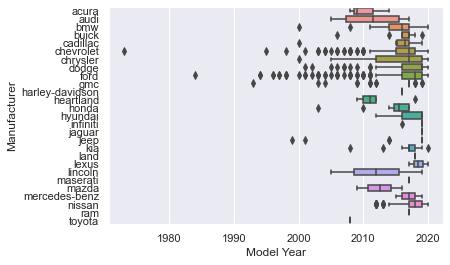

In [101]:
sns.boxplot(data = df_Method_Chain_by_Year2, y = "Manufacturer", x = "Model Year")

plt.xlabel("Model Year")
plt.ylabel("Manufacturer")
#plt.title("Quality of Manufacturer's Cars Based on their Model Year"

### By Year Analysis



### By Mileage

In [91]:
df_Method_Chain_by_Mileage_Graph = load_and_process_df_Method_Chain_by_Mileage("/Users/stevenzonneveld/Desktop/data301/project-group35-project/data/raw/MileStone1.csv")
df_Method_Chain_by_Mileage_Graph['Mileage'] = df_Method_Chain_by_Mileage_Graph['Mileage'].astype(int)
df_Method_Chain_by_Mileage_Graph

,Manufacturer,Mileage
595,acura,63500
390,acura,179389
374,acura,118250
409,audi,177422
444,audi,47213
...,...,...
2282,nissan,37655
2292,nissan,107734
2293,nissan,53098
505,ram,30421


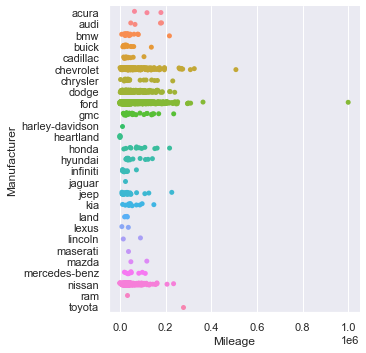

In [99]:
sns.catplot(data = df_Method_Chain_by_Mileage_Graph, y = "Manufacturer", x = "Mileage")

#plt.xlabel("Mileage")
#plt.ylabel("Manufacturer")
#plt.title("Quality of Manufacturer's Cars Based on their Mileage"

In [93]:
df_Method_Chain_by_Mileage_Graph.dtypes

Manufacturer    object
Mileage          int64
dtype: object

In [94]:
df_Method_Chain_by_Mileage_Graph['Mileage'] = df_Method_Chain_by_Mileage_Graph['Mileage'].astype(int)

In [95]:
df_Method_Chain_by_Mileage_Graph.dtypes

Manufacturer    object
Mileage          int64
dtype: object